# Fetch and inspect well data

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

import numpy as np

import rsf.api as sf

# Set a custom DATAPATH to Madagascar
%env DATAPATH=/home/rodrigo/Projetos/Viking/DATAPATH/

env: DATAPATH=/home/rodrigo/Projetos/Viking/DATAPATH/


In [2]:
sns.set_style('ticks')

## Well metadata table

| Original name | Alias | Keyword | Value |
|---------------|-------|---------|-------|
| Well 4 | Well A | Kelly bushing | 17.5 m |
| Well 4 | Well A | Water depth | 355 m |
| Well 4 | Well A | Shotpoint | 440 |
| Well 4 | Well A | CDP | 808 |
| Well 5 | Well B | Kelly bushing | 26.5 m |
| Well 5 | Well B | Water depth | 355.5 m |
| Well 5 | Well B | Shotpoint | 822 |
| Well 5 | Well B | CDP | 1572|
| Well 7 | Well C | Kelly bushing | 17.5 m |
| Well 7 | Well C | Shotpoint | 310 |
| Well 7 | Well C | CDP | 548 |

In [3]:
metadata = {
    'Well 4' : {
        'ALIAS' : 'Well A',
        'KB' : 17.5,
        'WD' : 355,
        'EP' : 440,
        'CDP' : 808
    },
    
    'Well 5' : {
        'ALIAS' : 'Well B',
        'KB' : 26.5,
        'WD' : 355.5,
        'EP' : 822,
        'CDP' : 1572
    },
    
    'Well 7' : {
        'ALIAS' : 'Well C',
        'KB' : 17.5, # not 100% sure about this
        'EP' : 310,
        'CDP' : 548
    }
}

In [4]:
# Fetching the data from the web
#!wget http://s3.amazonaws.com/open.source.geoscience/open_data/Mobil_Avo_Viking_Graben_Line_12/mobil_wellogs.tar.gz

In [5]:
# Now let's check the data integrity
# The MD5 checksum should be equal to 5cfbbabef17d96ea5bc0ef791ad62afb

!md5sum mobil_wellogs.tar.gz

5cfbbabef17d96ea5bc0ef791ad62afb  mobil_wellogs.tar.gz


In [6]:
# Now, lets extract the data
!tar xvzf mobil_wellogs.tar.gz

well4.blk
well4.elan
well4.log
well4.Q
well5.blk
well5.elan
well5.log
well5.Q
well7.Q


# Analysing Well 4

In [7]:
# First, lets inspect the .blk file
!head well4.blk | cat -n

     1	Blocked Log for Well No. 4. ....  69 layers.
     2	
     3	  Depth (m)   Vp (m/s)    Vs (m/s)  Density (kg/m^3)
     4	___________________________________________________
     5	      .0000   1500.000       .000   1000.000
     6	   375.0706   1760.607    544.796   1680.006
     7	   985.4184   2051.466    634.798   1749.350
     8	  1016.3556   2039.693    631.155   2017.447
     9	  1046.3784   2079.900    643.597   2027.111
    10	  1076.5536   2103.340    650.850   1986.157


In [8]:
# Now the .elan file
!head -15 well4.elan | cat -n

     1	Well #4
     2	_____________________________________________________________________________
     3	DEPT       Depth                			M
     4	VILL       Volume of Dry Clay 				V/V
     5	VXBW       Volume of Bound Water			V/V
     6	VCOA       Volume of Coal				V/V
     7	VQUA       Volume of Quartz				V/V
     8	VCLC       Volume of Calcite				V/V
     9	VPAR       Volume of Parrallel Pores			V/V
    10	VXOI       Volume of Oil				V/V
    11	VXGA       Volume of Gas				V/V
    12	VXWA       Volume of Water				V/V
    13	SDR        Standard Deviation of the Reconstruction	
    14	_____________________________________________________________________________
    15	  1011.7800     0.5387     0.3301     0.0000     0.1312     0.0000     0.0000     0.0000     0.0000     0.0000     2.1085


In [9]:
# Now the .log
!head -15 well4.log | cat -n

     1	Well #4
     2	
     3	Note:  -999.25 indicates "bad" or "missing" data value.
     4	_____________________________________________________________________________
     5	Column:    Type of Data:        Units:
     6	
     7	DEPT       Depth                M
     8	GR         Gamma Ray            GAPI
     9	PR         Poisson's Ratio
    10	RHOB       Density              K/M3
    11	CALI       Caliper              MM
    12	VELS       Shear Vel.           KM/S
    13	VELC       Compressional Vel.   KM/S
    14	_____________________________________________________________________________
    15	   985.4184    70.4346  -999.2500  1724.6432  -999.2500  -999.2500  -999.2500


In [10]:
# Finaly the .Q file
!head well4.Q | cat -n

     1	Well No 4
     2	Col 1. ... Measured depth in meters
     3	Col 2. ... One-way traveltime in seconds
     4	Col 3. ... Two-way traveltime in ms.
     5	Col 4. ... Q-value
     6	
     7	Depth    1WTT(s)   2WTT    Q
     8	____________________________________________
     9	3120    1.314     2628  169.734
    10	3110     1.31     2620  131.858


All well files are logs indexed by measured depth, no information on kelly bushing or any other datum elevation. It's easy enough to read these files using pandas, but we may need to resample if we want to write all logs to a single LAS file. Also, all log units are on S.I., just as God intended it.

In [11]:
logs = pd.read_csv('well4.log', skiprows=14,
                    names = ['DEPT', 'GR', 'PR', 'RHOB', 'CALI', 'VELS', 'VELC'],
                  sep='\s+', na_values=-999.25)

logs.head()

,DEPT,GR,PR,RHOB,CALI,VELS,VELC
0,985.4184,70.4346,NaN,1724.6432,NaN,NaN,NaN
1,985.5708,71.0972,NaN,1723.3544,NaN,NaN,NaN
2,985.7232,71.8204,NaN,1713.7261,NaN,NaN,NaN
3,985.8756,71.8210,NaN,1708.0879,NaN,NaN,NaN
4,986.0280,71.4551,NaN,1712.7991,NaN,NaN,NaN


In [12]:
# Lets check if this file has constant sampling depth
logs.DEPT.diff().unique()

array([   nan, 0.1524, 0.1524, 0.1524, 0.1524])

In [13]:
vol = pd.read_csv('well4.elan', skiprows=14,
                      names = ['DEPT', 'VILL', 'VXBW', 'VCOA', 'VQUA',
                             'VCLC', 'VPAR', 'VXOI', 'VXGA', 'VXWA', 'SDR'],
                  sep='\s+', na_values=-999.25)
cols = list(vol)
cols.remove('DEPT')

vol.loc[vol.SDR == 999.25, cols] = np.nan


vol.head()

,DEPT,VILL,VXBW,VCOA,VQUA,VCLC,VPAR,VXOI,VXGA,VXWA,SDR
0,1011.7800,0.5387,0.3301,0,0.1312,0,0,0,0,0,2.1085
1,1011.9324,0.5440,0.3334,0,0.1226,0,0,0,0,0,2.0122
2,1012.0848,0.5502,0.3372,0,0.1125,0,0,0,0,0,1.9540
3,1012.2372,0.5521,0.3384,0,0.1095,0,0,0,0,0,2.0860
4,1012.3896,0.5554,0.3404,0,0.1041,0,0,0,0,0,2.6594


In [14]:
# Now the .elan file
!head -14 well4.elan | cat -n

     1	Well #4
     2	_____________________________________________________________________________
     3	DEPT       Depth                			M
     4	VILL       Volume of Dry Clay 				V/V
     5	VXBW       Volume of Bound Water			V/V
     6	VCOA       Volume of Coal				V/V
     7	VQUA       Volume of Quartz				V/V
     8	VCLC       Volume of Calcite				V/V
     9	VPAR       Volume of Parrallel Pores			V/V
    10	VXOI       Volume of Oil				V/V
    11	VXGA       Volume of Gas				V/V
    12	VXWA       Volume of Water				V/V
    13	SDR        Standard Deviation of the Reconstruction	
    14	_____________________________________________________________________________


In [15]:
cols

['VILL', 'VXBW', 'VCOA', 'VQUA', 'VCLC', 'VPAR', 'VXOI', 'VXGA', 'VXWA', 'SDR']

In [16]:
# Facecolors for the volume plot
facecolor = {
    'VILL' : sns.xkcd_rgb['forest'],
    'VXBW' : sns.xkcd_rgb['royal blue'],
    'VQUA' : sns.xkcd_rgb['yellow'],
    'VCLC' : sns.xkcd_rgb['blue green'],
    'VPAR' : sns.xkcd_rgb['grey'],
    'VCOA' : sns.xkcd_rgb['black'],
    
    'VXWA' : sns.xkcd_rgb['aqua'],
    'VXOI' : sns.xkcd_rgb['bright green'],
    'VXGA' : sns.xkcd_rgb['bright red']
}

hatch = {
    'VILL' : '-',
    'VXBW' : '-',
    'VQUA' : '.',
    'VCLC' : '+',
    'VPAR' : None,
    'VCOA' : None,
    
    'VXWA' : None,
    'VXOI' : None,
    'VXGA' : None
}

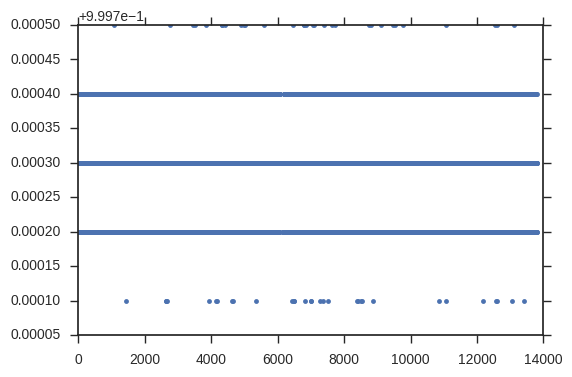

In [17]:
# Checking volume sums

cols = list(vol)
cols.remove('DEPT')
cols.remove('SDR')
plt.plot(vol[cols].sum(axis=1), '.')

In [18]:
from matplotlib.ticker import AutoMinorLocator
minor_locator = AutoMinorLocator(10)

In [19]:
plt.figure(figsize=(10,100))
ax = plt.subplot(151)

# Caliper
plt.plot(logs.CALI, logs.DEPT, 'k', label='CALI', lw=1)
plt.xlim(200, 600)
plt.gca().xaxis.tick_top()
plt.gca().set_xlabel('CALI (mm)')    
plt.gca().xaxis.set_label_position('top') 
plt.locator_params(axis='x', nbins=3)
plt.yticks(np.arange(np.floor(logs.DEPT.min() / 100) * 100,
                     np.ceil(logs.DEPT.max()/100) * 100 + 100, 100),
          rotation=90)

plt.gca().yaxis.set_minor_locator(minor_locator)
plt.grid()

# Gamma Ray
plt.subplot(152, sharey=ax)

## Plot normal curve
cutoff = np.percentile(logs[logs.GR.notnull()].GR, 50)

plt.fill_betweenx(logs.DEPT, logs.GR, cutoff, where= logs.GR > cutoff,
                  facecolor=sns.xkcd_rgb['puke green'])
plt.fill_betweenx(logs.DEPT, logs.GR, cutoff, where= logs.GR < cutoff,
                  facecolor=sns.xkcd_rgb['yellow'])

plt.plot(logs.GR, logs.DEPT, 'k-', label='GR', lw=1)

## Plot backup
plt.plot(logs.GR - 150, logs.DEPT, 'k--', label='GR', lw=1)

plt.xlim(0, 150)


plt.gca().xaxis.tick_top()
plt.gca().set_xlabel('GR (GAPI)')    
plt.gca().xaxis.set_label_position('top') 

plt.setp(plt.gca().get_yticklabels(), visible=False)
plt.locator_params(axis='x', nbins=3)
plt.grid()

# Plot density
plt.subplot(153, sharey=ax)

## Normal curve
plt.plot(logs.RHOB, logs.DEPT, color=sns.xkcd_rgb['brick'], label='RHOB', lw=1)

## Plot backup
plt.plot(logs.RHOB + 1000, logs.DEPT, ls='--', color=sns.xkcd_rgb['brick'],
         label='RHOB', lw=1)

plt.gca().xaxis.tick_top()
plt.gca().set_xlabel(u'RHOB (kg/m³)')    
plt.gca().xaxis.set_label_position('top') 

plt.setp( plt.gca().get_yticklabels(), visible=False)
plt.gca().set_xticks([1950, 2200, 2450, 2700, 2950])
plt.gca().set_xticklabels([1950, '', 2450, '', 2950])
plt.grid()

plt.xlim(2950, 1950)

# Plot velocity
plt.subplot(154, sharey=ax)

plt.plot(logs.VELC, logs.DEPT, color=sns.xkcd_rgb['blue green'], label='VELC', lw=1)
plt.plot(logs.VELS, logs.DEPT, color=sns.xkcd_rgb['blood red'], label='VELS', lw=1)


plt.gca().xaxis.tick_top()
plt.gca().set_xlabel('Velocity (km/s)')    
plt.gca().xaxis.set_label_position('top') 

plt.setp( plt.gca().get_yticklabels(), visible=False)
plt.locator_params(axis='x', nbins=3)
plt.grid()

# Plot Volumes
plt.subplot(155, sharey=ax)

y = np.zeros(len(vol))
    
for i, col in enumerate(['VILL', 'VXBW', 'VQUA', 'VCLC', 'VPAR', 'VCOA', 'VXWA', 'VXOI', 'VXGA']):
    y += vol[col]
    plt.fill_betweenx(vol.DEPT, y, 0,
                  facecolor=facecolor[col],
                 zorder=-i, lw=0, label=col,
                     hatch=hatch[col])

#plt.legend(loc='upper center', bbox_to_anchor=(-2.95, 1.07), ncol=5)
plt.gca().xaxis.tick_top()
plt.gca().set_xlabel('Volume')    
plt.gca().xaxis.set_label_position('top') 

plt.setp( plt.gca().get_yticklabels(), visible=False)
plt.locator_params(axis='x', nbins=3)
plt.grid(axis='y')
plt.xlim(0,1)

plt.autoscale(enable=True, axis='y', tight=True)
#plt.ylim(1500, 2500)
plt.ylim(plt.ylim()[::-1])

plt.tight_layout()

plt.savefig('well_4_composite_log.pdf')

plt.close()

# Analysing well 5

In [20]:
# First, lets inspect the .blk file
!head well5.blk | cat -n

     1	Blocked Log for Well No. 5 .... 50 layers.
     2	
     3	  Depth (m)   Vp (m/s)    Vs (m/s)  Density (kg/m^3)
     4	____________________________________________________
     5	      .0000   1500.000       .000   1000.000
     6	   375.0528   1671.133    638.467   1680.016
     7	   999.8966   1959.588    748.673   2199.997
     8	  1036.3202   2046.151    809.360   2200.026
     9	  1178.0522   2210.290    933.274   2199.997
    10	  1218.8954   2162.628    850.720   2199.997


In [21]:
# Now the .log
!head -15 well5.log | cat -n

     1	Well #5 
     2	
     3	Note: -999.25 indicates "bad" or "missing" data value.
     4	_____________________________________________________________________________
     5	Column:    Type of Data:        Units:
     6	
     7	DEPT       Depth                M
     8	GR         Gamma Ray            GAPI
     9	PR         Poisson's Ratio
    10	RHOB       Density              K/M3
    11	CALI       Caliper              MM
    12	VELC       Compressional Vel.   KM/S
    13	VELS       Shear Vel.           KM/S
    14	_____________________________________________________________________________
    15	   999.8966  -999.2500     0.3167  -999.2500   451.2469     1.8550     0.9607


In [22]:
# Finaly the .Q file
!head well5.Q | cat -n

     1	Well No. 5
     2	Col 1 ... Measured Depth in meters
     3	Col 2 ... One-way Traveltime (seconds)
     4	Col 3 ... Two-way Traveltime (ms)
     5	Col 4 ... Q-value
     6	
     7	Depth    1WTT(s)   2WTT    Q
     8	____________________________________________
     9	3740    1.547     3094  156.081
    10	3720    1.542     3084  123.449


Well 5 has the same log set as Well 4. So we just repeat the drill.

In [23]:
logs = pd.read_csv('well5.log', skiprows=14,
                    names = ['DEPT', 'GR', 'PR', 'RHOB', 'CALI', 'VELC', 'VELS'],
                  sep='\s+', na_values=[-999.25, -9999.25])

logs.head()

,DEPT,GR,PR,RHOB,CALI,VELC,VELS
0,999.8966,NaN,0.3167,NaN,451.2469,1.8550,0.9607
1,1000.0490,NaN,0.2946,NaN,451.2469,1.8550,1.0010
2,1000.2014,NaN,0.3105,NaN,451.2469,1.8550,0.9726
3,1000.3538,NaN,0.3291,NaN,451.2469,1.8736,0.9456
4,1000.5062,NaN,0.3365,NaN,451.5180,1.8924,0.9394


In [24]:
# Lets check if this file has constant sampling depth
logs.DEPT.diff().unique()

array([   nan, 0.1524, 0.1524, 0.1524, 0.1524])

In [25]:
# Now the .elan file
!head -15 well5.elan | cat -n

     1	Well #5
     2	_____________________________________________________________________________
     3	DEPT       Depth                			M
     4	VILL       Volume of Dry Clay 				V/V
     5	VXBW       Volume of Bound Water			V/V
     6	VCLC       Volume of Calcite				V/V
     7	VQUA       Volume of Quartz				V/V
     8	VPAR       Volume of Parallel Pores			V/V
     9	VXOI       Volume of Oil                                V/V
    10	VXGA       Volume of Gas				V/V
    11	VXWA       Volume of Water				V/V
    12	SDR        Standard Deviation of the Reconstruction	
    13	_____________________________________________________________________________
    14	  2688.1800     0.6740     0.2621     0.0000     0.0000     0.0638     0.0000     0.0000     0.0000     3.9725
    15	  2688.3324     0.6687     0.2600     0.0000     0.0000     0.0713     0.0000     0.0000     0.0000     3.8290


In [26]:
# There's to coal on well 5

vol = pd.read_csv('well5.elan', skiprows=14,
                      names = ['DEPT', 'VILL', 'VXBW', 'VCLC',
                             'VQUA', 'VPAR', 'VXOI', 'VXGA', 'VXWA', 'SDR'],
                  sep='\s+', na_values=-999.25)
cols = list(vol)
cols.remove('DEPT')

vol.loc[vol.SDR == 999.25, cols] = np.nan


vol.head()

,DEPT,VILL,VXBW,VCLC,VQUA,VPAR,VXOI,VXGA,VXWA,SDR
0,2688.3324,0.6687,0.2600,0,0,0.0713,0,0,0,3.8290
1,2688.4848,0.6596,0.2565,0,0,0.0839,0,0,0,3.3888
2,2688.6372,0.6574,0.2557,0,0,0.0869,0,0,0,3.7252
3,2688.7896,0.6638,0.2581,0,0,0.0781,0,0,0,4.2696
4,2688.9420,0.6672,0.2594,0,0,0.0734,0,0,0,4.3662


## Ploting Well 5 composite log

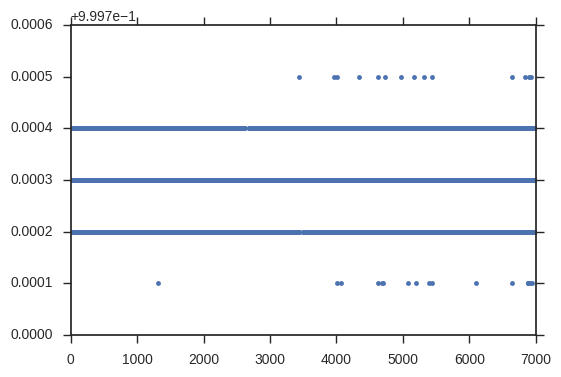

In [27]:
# Checking volume sums

cols = list(vol)
cols.remove('DEPT')
cols.remove('SDR')
plt.plot(vol[cols].sum(axis=1), '.')

In [28]:
plt.figure(figsize=(10,100))
ax = plt.subplot(151)

# Caliper
plt.plot(logs.CALI, logs.DEPT, 'k', label='CALI', lw=1)
plt.xlim(200, 600)
plt.gca().xaxis.tick_top()
plt.gca().set_xlabel('CALI (mm)')    
plt.gca().xaxis.set_label_position('top') 
plt.locator_params(axis='x', nbins=3)
plt.yticks(np.arange(np.floor(logs.DEPT.min() / 100) * 100,
                     np.ceil(logs.DEPT.max()/100) * 100 + 100, 100),
          rotation=90)

plt.gca().yaxis.set_minor_locator(minor_locator)
plt.grid()

# Gamma Ray
plt.subplot(152, sharey=ax)

## Plot normal curve
cutoff = np.percentile(logs[logs.GR.notnull()].GR, 50)

plt.fill_betweenx(logs.DEPT, logs.GR, cutoff, where= logs.GR > cutoff,
                  facecolor=sns.xkcd_rgb['puke green'])
plt.fill_betweenx(logs.DEPT, logs.GR, cutoff, where= logs.GR < cutoff,
                  facecolor=sns.xkcd_rgb['yellow'])

plt.plot(logs.GR, logs.DEPT, 'k-', label='GR', lw=1)

## Plot backup
plt.plot(logs.GR - 150, logs.DEPT, 'k--', label='GR', lw=1)

plt.xlim(0, 150)


plt.gca().xaxis.tick_top()
plt.gca().set_xlabel('GR (GAPI)')    
plt.gca().xaxis.set_label_position('top') 

plt.setp(plt.gca().get_yticklabels(), visible=False)
plt.locator_params(axis='x', nbins=3)
plt.grid()

# Plot density
plt.subplot(153, sharey=ax)

## Normal curve
plt.plot(logs.RHOB, logs.DEPT, color=sns.xkcd_rgb['brick'], label='RHOB', lw=1)

## Plot backup
plt.plot(logs.RHOB + 1000, logs.DEPT, ls='--', color=sns.xkcd_rgb['brick'],
         label='RHOB', lw=1)

plt.gca().xaxis.tick_top()
plt.gca().set_xlabel(u'RHOB (kg/m³)')    
plt.gca().xaxis.set_label_position('top') 

plt.setp( plt.gca().get_yticklabels(), visible=False)
plt.gca().set_xticks([1950, 2200, 2450, 2700, 2950])
plt.gca().set_xticklabels([1950, '', 2450, '', 2950])
plt.grid()

plt.xlim(2950, 1950)

# Plot velocity
plt.subplot(154, sharey=ax)

plt.plot(logs.VELC, logs.DEPT, color=sns.xkcd_rgb['blue green'], label='VELC', lw=1)
plt.plot(logs.VELS, logs.DEPT, color=sns.xkcd_rgb['blood red'], label='VELS', lw=1)


plt.gca().xaxis.tick_top()
plt.gca().set_xlabel('Velocity (km/s)')    
plt.gca().xaxis.set_label_position('top') 

plt.setp( plt.gca().get_yticklabels(), visible=False)
plt.locator_params(axis='x', nbins=3)
plt.grid()

# Plot Volumes
plt.subplot(155, sharey=ax)

y = np.zeros(len(vol))
    
for i, col in enumerate(['VILL', 'VXBW', 'VQUA', 'VCLC', 'VPAR', 'VXWA', 'VXOI', 'VXGA']):
    y += vol[col]
    plt.fill_betweenx(vol.DEPT, y, 0,
                  facecolor=facecolor[col],
                 zorder=-i, lw=0, label=col,
                     hatch=hatch[col])

#plt.legend(loc='upper center', bbox_to_anchor=(-2.95, 1.07), ncol=5)
plt.gca().xaxis.tick_top()
plt.gca().set_xlabel('Volume')    
plt.gca().xaxis.set_label_position('top') 

plt.setp( plt.gca().get_yticklabels(), visible=False)
plt.locator_params(axis='x', nbins=3)
plt.grid(axis='y')
plt.xlim(0,1)

plt.autoscale(enable=True, axis='y', tight=True)
#plt.ylim(1500, 2500)
plt.ylim(plt.ylim()[::-1])

plt.tight_layout()

plt.savefig('well_5_composite_log.pdf')
plt.close()

In [29]:
## Viewing the results
# You can view the composite logs of both wells using evince

#!evince well_4_composite_log.pdf
#!evince well_5_composite_log.pdf

## Covert logs to LAS format

To make it easier to use these wells, we should convert their logs to LAS format.

# Preliminar time-depth relationship

For a first approximation we can use the VSP times as a time-depth relationship. After we have a well processed seismic we can fine tune it with a proper well tie

In [30]:
!head well4.Q | cat -n; echo
!head well5.Q | cat -n; echo
!head well7.Q | cat -n; echo

     1	Well No 4
     2	Col 1. ... Measured depth in meters
     3	Col 2. ... One-way traveltime in seconds
     4	Col 3. ... Two-way traveltime in ms.
     5	Col 4. ... Q-value
     6	
     7	Depth    1WTT(s)   2WTT    Q
     8	____________________________________________
     9	3120    1.314     2628  169.734
    10	3110     1.31     2620  131.858

     1	Well No. 5
     2	Col 1 ... Measured Depth in meters
     3	Col 2 ... One-way Traveltime (seconds)
     4	Col 3 ... Two-way Traveltime (ms)
     5	Col 4 ... Q-value
     6	
     7	Depth    1WTT(s)   2WTT    Q
     8	____________________________________________
     9	3740    1.547     3094  156.081
    10	3720    1.542     3084  123.449

     1	Well No. 7
     2	
     3	Col 1 ... Measured Depth in meters
     4	Col 2 ... One-way traveltime in seconds
     5	Col 3 ... Two-way traveltime in ms
     6	Col 4 ... Q-value
     7	
     8	Depth   1WTT(s)   2WTT(ms)        Q-Value
     9	__________________________________________
    10	2550

In [31]:
# Read well 4 data
vsp = pd.read_csv('well4.Q', sep='\s+', names=['DEPT', 'OWT', 'TWT', 'Q'],
                 skiprows=8)
vsp['WELL'] = 'Well 4'

# Read well 5 data
tmp = pd.read_csv('well5.Q', sep='\s+', names=['DEPT', 'OWT', 'TWT', 'Q'],
                 skiprows=8)
tmp['WELL'] = 'Well 5'
vsp = vsp.append(tmp)

# Read well 7 data
tmp = pd.read_csv('well7.Q', sep='\s+', names=['DEPT', 'OWT', 'TWT', 'Q'],
                 skiprows=9)
tmp['WELL'] = 'Well 7'
vsp = vsp.append(tmp)

vsp.TWT /= 1000.
vsp.head()

,DEPT,OWT,TWT,Q,WELL
0,3120,1.314,2.628,169.734,Well 4
1,3110,1.310,2.620,131.858,Well 4
2,3100,1.310,2.620,130.688,Well 4
3,3090,1.307,2.614,133.543,Well 4
4,3080,1.302,2.604,127.794,Well 4


In [32]:
vsp['SSTVD'] = vsp.WELL.map(lambda x: metadata[x]['KB']) - vsp.DEPT

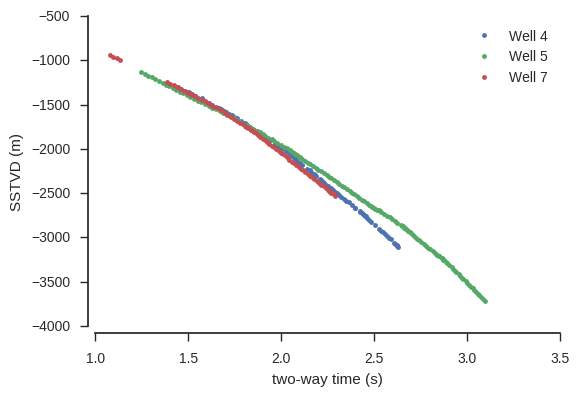

In [33]:
for well, gr in vsp.groupby('WELL'):
    plt.plot(gr.TWT, gr.SSTVD, '.', label=well)
    
plt.ylabel('SSTVD (m)')
plt.xlabel('two-way time (s)')
plt.legend(loc='best')
sns.despine(offset=5)

# Making a RMS velocity curve for Well 5

First we need a shallow layers velocity model, we can build that using first break picks and solving critical refraction equations.

In [34]:
def rolling_sum(x, N):
    cumsum = np.cumsum(np.insert(x, 0, 0))
    return (cumsum[N:] - cumsum[:-N])

def modified_energy_ratio(x,N):
    a = np.append(np.ones(N-1)*np.mean(x[:2]), x)
    a = rolling_sum(a*a,N)

    b = np.append(x, np.ones(N-1)*np.mean(x[:-2]))
    b = rolling_sum(b*b,N)

    return np.power(np.abs(x)*b/(a + 0.0001),3)

In [35]:
# Let's get the shotpoint on top of Well 5
common_shot = 'line_12_csg_raw.rsf'
data_sample = 'sample_shot.rsf'

# Grab only shotpoint 822
!sfwindow < {common_shot} n3=1 f3=713 > {data_sample}
!sfin {data_sample}

sample_shot.rsf:
    in="/home/rodrigo/Projetos/Viking/DATAPATH/sample_shot.rsf@"
    esize=4 type=float form=native 
    n1=1500        d1=0.004       o1=0          label1="Time" unit1="s" 
    n2=120         d2=1           o2=0          label2="Trace" 
    n3=1           d3=1           o3=713        
	180000 elements 720000 bytes


In [36]:
data_sample = sf.Input(data_sample)

n1 = data_sample.int('n1')
n2 = data_sample.int('n2')
d1 = data_sample.float('d1')
o1 = data_sample.float('o1')

data = np.zeros((n2, n1), dtype=np.float32)
data_sample.read(data)

In [37]:
picks = []

for trace in data:
    picks.append(np.argmax(modified_energy_ratio(trace, 100)))
    
picks = np.array(picks)
picks = picks[::-1]*d1 + o1

In [38]:
# Water layer properties
v_water = 1500. #m/s
h_water = metadata['Well 5']['WD'] #water depth
owt_water = h_water/v_water

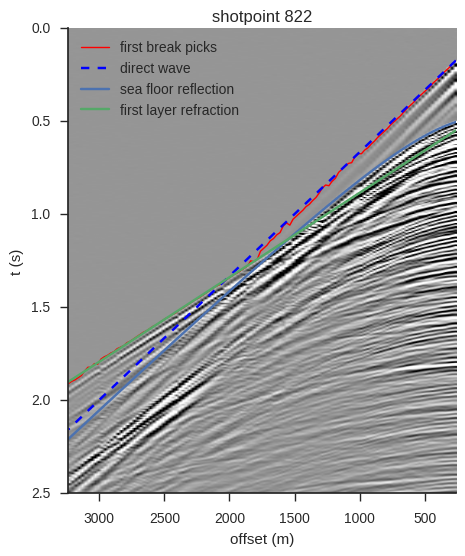

In [39]:
t = np.arange(n1) * d1 + o1
x = np.arange(120) * 25 + 262 # Maybe I should read this from the header

perc = np.percentile(data.ravel(), 99)

extent = [x[-1], x[0], t[-1], t[0]]

plt.figure(figsize=(5,6))
plt.imshow(data.clip(-perc, perc).T, aspect='auto', extent=extent)

# Plottin the first break picks
plt.plot(x, picks, color='r', lw=1, label='first break picks')

# Plotting the events
# direct wave
plt.plot(x, x/v_water, 'b--', label='direct wave')
# water bottom reflection
plt.plot(x, 2* np.sqrt(x**2/(4*v_water**2) + (h_water/v_water)**2),
         label='sea floor reflection')

# X_cross for the first layer: https://en.wikipedia.org/wiki/Seismic_refraction
x_cross = 2150 # I picked this from the plot

p1, t01 = np.polyfit(x[x > 2150], picks[x > 2150], deg=1)
v1 = 1/p1

plt.plot(x, t01 + x/v1, label='first layer refraction')


plt.ylabel('t (s)')
plt.xlabel('offset (m)')

plt.title('shotpoint %d' % metadata['Well 5']['EP'])

plt.axis('tight')
plt.ylim(2.5, 0)
sns.despine()

plt.legend(loc='best')

### First layer properties

In [40]:
ic = np.arcsin(v_water/v1)
h0 = t01*v_water/(2*np.cos(ic))
h0, v1, h0/v1

(441.95335053940505, 2200.5184672994565, 0.20084055512689414)

In [41]:
# Water layer properties
kb = metadata['Well 5']['KB'] # KB for datum conversions

# RMS velocity for Well 5
rms = pd.DataFrame({'DEPT' : [kb, h_water + kb, h_water + kb + h0],
                    'SSTVD' : [0, -h_water, -h_water - h0],
                    'OWT' : [0, owt_water, owt_water + h0/v1]})

rms['TWT'] = rms.OWT * 2

rms = rms.append(vsp.query('WELL == "Well 5"')[['DEPT', 'SSTVD', 'OWT', 'TWT']])
rms.sort_values('DEPT', inplace=True)
rms.reset_index(inplace=True, drop=True)

In [42]:
rms.head()

,DEPT,OWT,SSTVD,TWT
0,26.500000,0.000000,0.000000,0.000000
1,382.000000,0.237000,-355.500000,0.474000
2,823.953351,0.437841,-797.453351,0.875681
3,1160.000000,0.624000,-1133.500000,1.248000
4,1180.000000,0.634000,-1153.500000,1.268000


In [43]:
rms['VINT'] = rms.DEPT.diff()/rms.OWT.diff()
rms.VINT = rms.VINT.fillna(1500)

while(np.sum(~rms.VINT.between(1500, 8000)) > 0):
    rms = rms[rms.VINT.between(1500, 8000)]
    rms['VINT'] = rms.DEPT.diff()/rms.OWT.diff()
    rms.VINT = rms.VINT.fillna(1500)

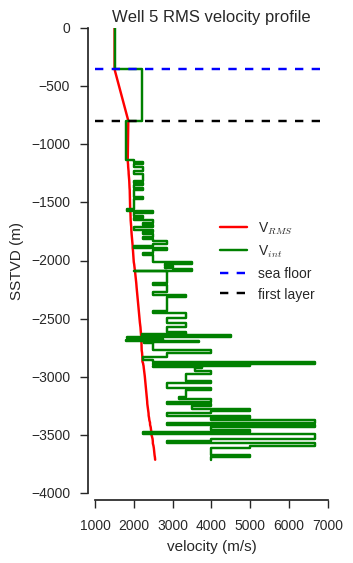

In [44]:
rms['VRMS'] = np.sqrt(np.cumsum(rms.VINT**2 * rms.OWT.diff())/np.cumsum(rms.OWT.diff()))
rms.VRMS = rms.VRMS.fillna(1500)

plt.figure(figsize=(3,6))
plt.plot(rms.VRMS, rms.SSTVD, color='r', label='V$_{RMS}$')
plt.step(rms.VINT, rms.SSTVD, color='g', where='post', label='V$_{int}$')
plt.axhline(-metadata['Well 5']['WD'], ls='--', label='sea floor')
plt.axhline(-h_water - h0, color='k', ls='--', label='first layer')

plt.xlabel('velocity (m/s)')
plt.ylabel('SSTVD (m)')

plt.title('Well 5 RMS velocity profile')

plt.legend(loc='best')
sns.despine(offset=5)

In [45]:
rms.to_csv('well_5_rms_profile.txt', index=False)